# Feature extracting

In [694]:
import numpy as np
import pickle
import os

IMAGE_FOLDER="F:\BSU_FAMCS\BMI\CourseProject\Datasets\ATiles"

def pickling_in(name):
    """Loading X from binary file "name".pickle"""
    pickle_in=open("{}.pickle".format(name),"rb")
    X=pickle.load(pickle_in)
    pickle_in.close()
    return X

def pickling_out(X,name):
    """Saving X in binary file "name".pickle"""
    pickle_out=open("{}.pickle".format(name),"wb")
    pickle.dump(X,pickle_out)
    pickle_out.close()

trainX=pickling_in(os.path.join(IMAGE_FOLDER,"trainX"))
trainY=pickling_in(os.path.join(IMAGE_FOLDER,"trainYbrown"))     
trainYblue=pickling_in(os.path.join(IMAGE_FOLDER,"trainYblue")) 

testX=pickling_in(os.path.join(IMAGE_FOLDER,"testX"))
testY=pickling_in(os.path.join(IMAGE_FOLDER,"testYbrown"))  
testYblue=pickling_in(os.path.join(IMAGE_FOLDER,"testYblue"))  

In [695]:
trainY=pickling_in(os.path.join(IMAGE_FOLDER,"trainYbrown"))     

testY=pickling_in(os.path.join(IMAGE_FOLDER,"testYbrown"))  

In [696]:
trainX[:,:,:,[0,1,2]]=trainX[:,:,:,[2,1,0]]

testX[:,:,:,[0,1,2]]=testX[:,:,:,[2,1,0]]

In [691]:
trainYproportion=trainY*65/(trainY*65+trainYblue+1.)

testYproportion=testY*65/(testY*65+testYblue+1.)
print(max(trainYproportion))

[0.96428571]


In [697]:
trainX.shape

(260, 224, 224, 3)

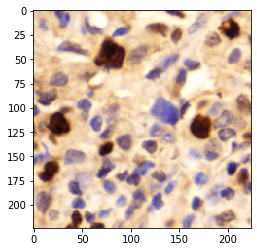

In [698]:
plt.imshow(trainX[2])

In [468]:
import tensorflow.keras as keras
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.layers import Flatten, Input,MaxPool1D, MaxPooling2D

model=ResNet50(weights="imagenet",pooling="avg",include_top=False)

In [469]:
#trainX=preprocess_input(trainX)
#testX=preprocess_input(testX)

feature_trainX=model.predict(trainX)
feature_testX=model.predict(testX)

In [470]:
feature_trainX[1].shape[0]

2048

In [471]:
feature_trainX_flattened=feature_trainX.reshape(260,-1)

feature_testX_flattened=feature_testX.reshape(40,-1)

pickling_out(feature_trainX_flattened,os.path.join(IMAGE_FOLDER,"feature_trainX"))
pickling_out(feature_testX_flattened,os.path.join(IMAGE_FOLDER,"feature_testX"))



In [472]:
feature_trainX_flattened.shape

(260, 2048)

In [473]:
from sklearn.decomposition import PCA

temp=PCA(2)
temp.fit(feature_trainX_flattened)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [474]:
a=temp.transform(feature_trainX_flattened)

In [200]:
max(trainY)
sum(trainY>0.8)

array([6])

In [475]:
trainY_color=np.zeros((len(trainY),))
thresholds=[0,0.1,0.5,1]
for threshold in range(len(thresholds)-1):
    for i in range(len(trainY)):
        if trainY[i]>thresholds[threshold] and trainY[i]<thresholds[threshold+1]:
            trainY_color[i]=threshold

print(trainY_color)

[1. 1. 0. 0. 1. 1. 1. 1. 2. 0. 2. 1. 1. 0. 1. 0. 1. 1. 0. 1. 2. 2. 0. 0.
 1. 2. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 2. 2. 0. 1. 1. 1.
 0. 2. 0. 0. 0. 1. 1. 0. 2. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.
 1. 1. 2. 1. 0. 0. 0. 0. 2. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 2. 1.
 1. 0. 1. 0. 0. 2. 0. 1. 1. 2. 1. 2. 2. 0. 0. 2. 0. 1. 1. 2. 1. 1. 2. 0.
 0. 1. 0. 2. 1. 1. 2. 1. 1. 1. 1. 0. 2. 1. 1. 1. 1. 1. 0. 1. 1. 1. 2. 2.
 1. 2. 0. 0. 1. 0. 2. 0. 2. 2. 1. 2. 0. 1. 0. 1. 2. 1. 0. 2. 1. 1. 0. 0.
 1. 2. 1. 0. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 0. 0. 1. 0. 0. 1. 2. 2. 1.
 1. 1. 1. 1. 1. 1. 2. 1. 1. 0. 1. 0. 0. 0. 1. 2. 0. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 2. 2. 1. 1. 1. 0. 0. 1. 0. 2. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 2. 2. 0. 1. 0. 1. 0. 0. 2. 1. 1. 1. 1. 1. 1. 0.]


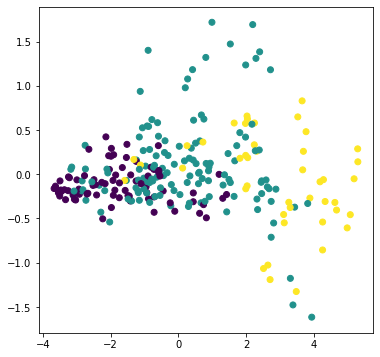

In [476]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(a[:,0],a[:,1],c=trainY_color)
plt.show()

In [699]:
trainY_reshaped=trainY.reshape(260)
testY_reshaped=testY.reshape((-1,1))
trainYproportion_reshaped=trainYproportion.reshape(260)
testYproportion_reshaped=testYproportion.reshape((-1,1))
len(testY_reshaped)
len(testY_reshaped)

41

In [478]:
from sklearn.svm import SVR
import math
c=1
e=0.05

svrModel=SVR(kernel="linear",gamma="scale",C=c,epsilon=e)


In [481]:
svrModel.fit(feature_trainX_flattened,trainYproportion_reshaped)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [482]:
predictedY=svrModel.predict(feature_testX_flattened)

In [483]:
predictedY


array([0.14429327, 0.15331095, 0.31343873, 0.11990902, 0.2907648 ,
       0.3754402 , 0.35717041, 0.58738952, 0.20812305, 0.23561949,
       0.15375086, 0.12153251, 0.69017227, 0.38208127, 0.19827313,
       0.22941021, 0.44175804, 0.10028549, 0.40964331, 0.34617106,
       0.25549688, 0.18732135, 0.82690204, 0.15296185, 0.29851281,
       0.38522614, 0.34068598, 0.58183385, 0.42064116, 0.56779615,
       0.26583739, 0.37912567, 0.14036039, 0.39883671, 0.18990602,
       0.19979128, 0.26474085, 0.33497491, 0.38394148, 0.17814461])

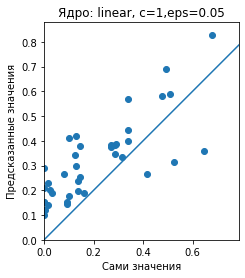

In [485]:
import matplotlib.pyplot as plt
import math

plt.scatter(testY_reshaped,predictedY)
plt.title("Ядро: {}, c={},eps={}".format(kernel,c,e))
plt.xlabel('Сами значения')
plt.ylabel('Предсказанные значения')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

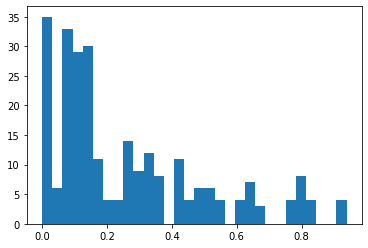

In [501]:
plt.hist(trainY_reshaped,bins=30)
plt.show()

In [322]:
L=loss(svrModel,feature_testX_flattened,testY_reshaped)

NameError: name 'loss' is not defined

In [500]:
svrModel.score(feature_trainX_flattened,trainY_reshaped)

0.5908691773968443

##  GLCM Co-ocurrance matrix

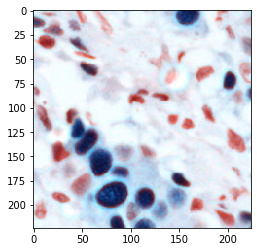

In [654]:
image=trainX[4]
plt.imshow(image)

In [655]:

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

gray_image=rgb2gray(image)
type(gray_image)

numpy.ndarray

In [439]:
gray_image=gray_image*255
gray_image=gray_image.astype("int")
np.max(gray_image)

253

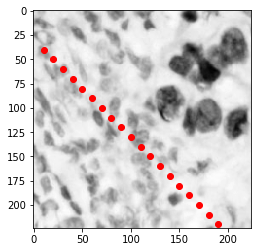

In [440]:
dot_x=[i*10 for i in range(1,20)]
dot_y=[i*10+30 for i in range(1,20)]
plt.imshow(gray_image,cmap="gray")
plt.plot(dot_x,dot_y, "ro")
plt.show()

ValueError: cannot reshape array of size 2359296 into shape (256,256)

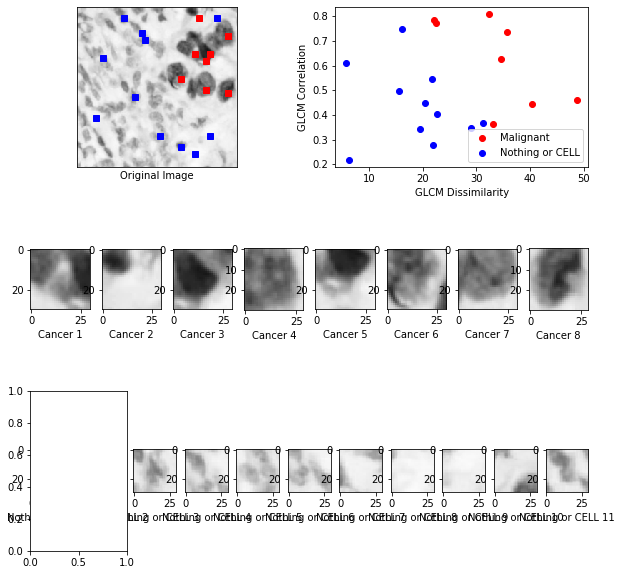

In [502]:
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops

PATCH_SIZE = 30

# select some patches from grassy areas of the image
grass_locations = [(50,150),(0,155),(50,170),(25,195),(60,165),(85,130),(100,165),(105,195)]
grass_patches = []
for loc in grass_locations:
    grass_patches.append(gray_image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

# select some patches from sky areas of the image
sky_locations = [(180,130),(55,20),(110,65),(20,75),(165,100),(30,80),(140,10),(190,150),(165,170),(0,180),(0,50)]
sky_patches = []
for loc in sky_locations:
    sky_patches.append(gray_image[loc[0]:loc[0] + PATCH_SIZE,
                             loc[1]:loc[1] + PATCH_SIZE])
    
    
# create the figure
fig = plt.figure(figsize=(10, 10))


# compute some GLCM properties each patch
xs = []
ys = []
glcms=[]
for patch in (grass_patches + sky_patches):
    glcm = greycomatrix(patch, distances=[5,5,5,5,10,10], angles=[0,np.pi/2,np.pi/6,np.pi/3,0,np.pi/2], levels=256,
                        symmetric=True, normed=True)
    glcms.append(glcm)
    xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(greycoprops(glcm, 'correlation')[0, 0])



# display original image with locations of patches
ax = fig.add_subplot(3, 2, 1)
ax.imshow(gray_image, cmap=plt.cm.gray,
          vmin=0, vmax=255)
for (y, x) in grass_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'rs')
for (y, x) in sky_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
ax.set_xlabel('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(3, 2, 2)
ax.plot(xs[:len(grass_patches)], ys[:len(grass_patches)], 'ro',
        label='Malignant')
ax.plot(xs[len(grass_patches):], ys[len(grass_patches):], 'bo',
        label='Nothing or CELL')
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()

# display the image patches
for i, patch in enumerate(grass_patches):
    ax = fig.add_subplot(3, len(grass_patches), len(grass_patches)*1 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Cancer %d' % (i + 1))

for i, patch in enumerate(sky_patches):
    ax = fig.add_subplot(3, len(sky_patches), len(sky_patches)*2 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Nothing or CELL %d' % (i + 1))
    
    


# display the patches and plot
fig.suptitle('Grey level co-occurrence matrix features', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

## Training tail, simple dense dnn

In [230]:
model=ResNet50(weights="imagenet",pooling="avg",include_top=False)
print(model.output.reshape(None,7,7,2048))
pooling=MaxPooling2D()(model.output)
model.summary()

AttributeError: 'Tensor' object has no attribute 'reshape'

In [486]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model_end=Sequential()

#model_end.add(Dense(512,activation="relu"))
#model_end.add(Dropout(0.3))

model_end.add(Dense(128,activation="relu"))
#model_end.add(Dropout(0.3))

model_end.add(Dense(32,activation="relu"))
#model_end.add(Dropout(0.2))

#model_end.add(Dense(4,activation="relu"))


model_end.add(Dense(1,activation="sigmoid"))

In [487]:
model_end.compile(loss="mae",metrics=["accuracy"])

In [488]:
#np.log(trainY_reshaped+1.)
history=model_end.fit(feature_trainX_flattened,
              trainYproportion_reshaped,
             batch_size=16,
             epochs=30)

Train on 260 samples
Epoch 1/30
260/260 [==============================] - 1s 6ms/sample - loss: 0.2800 - accuracy: 0.0846
Epoch 2/30
260/260 [==============================] - 0s 1ms/sample - loss: 0.2581 - accuracy: 0.1000TA: 0s - loss: 0.2504 - accuracy: 
Epoch 3/30
260/260 [==============================] - 0s 831us/sample - loss: 0.2086 - accuracy: 0.1038
Epoch 4/30
260/260 [==============================] - 0s 627us/sample - loss: 0.2272 - accuracy: 0.1038
Epoch 5/30
260/260 [==============================] - 0s 634us/sample - loss: 0.2075 - accuracy: 0.1038
Epoch 6/30
260/260 [==============================] - 0s 831us/sample - loss: 0.2170 - accuracy: 0.1038
Epoch 7/30
260/260 [==============================] - 0s 924us/sample - loss: 0.2037 - accuracy: 0.1038
Epoch 8/30
260/260 [==============================] - 0s 735us/sample - loss: 0.2044 - accuracy: 0.1038
Epoch 9/30
260/260 [==============================] - 0s 615us/sample - loss: 0.1972 - accuracy: 0.1038
Epoch 10/30
2

In [489]:
dnn_predicted=model_end.predict(feature_testX_flattened)

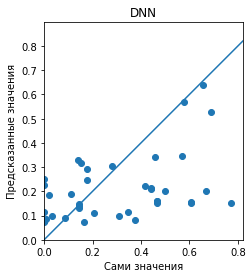

In [491]:
import matplotlib.pyplot as plt
import math

plt.scatter(testYproportion_reshaped,dnn_predicted)
plt.title("DNN")
plt.xlabel('Сами значения')
plt.ylabel('Предсказанные значения')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

## Random Forest Regressor

In [366]:
from sklearn.ensemble import RandomForestRegressor

In [429]:
forest=RandomForestRegressor(n_estimators=50)

In [492]:
forest.fit(feature_trainX_flattened,
              trainY_reshaped)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [493]:
forest_predicted=forest.predict(feature_testX_flattened)


In [494]:
len(forest_predicted)

40

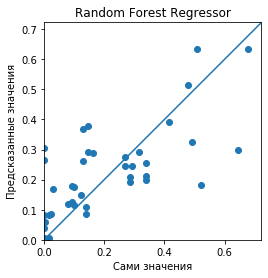

In [495]:
import matplotlib.pyplot as plt
import math

plt.scatter(testY_reshaped,forest_predicted)
plt.title("Random Forest Regressor")
plt.xlabel('Сами значения')
plt.ylabel('Предсказанные значения')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [496]:
forest.score(feature_testX_flattened,testY_reshaped)

0.490411608725961

# TRAINING by GLCM as a feature

In [701]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def make_gray(rgb):
    gray=rgb2gray(rgb)
    gray=gray*255
    gray=gray.astype("int")
    gray=reduction(gray)
    return gray

def reduction(gray):   
    for i in range(gray.shape[0]):
        for j in range(gray.shape[1]):
            rest=gray[i,j]//5
            gray[i,j]=rest
    return gray         

In [702]:
gray_trainX=make_gray(trainX)
gray_testX=make_gray(testX)

In [703]:
testX.shape

(41, 224, 224, 3)

In [704]:
glcm_trainX=[]
for i in range(len(gray_trainX)):
    glcm = greycomatrix(gray_trainX[i],
                        distances=[5,10], 
                        angles=[0,np.pi/2,np.pi/4],
                        levels=51, symmetric=True, normed=True)
    a=greycoprops(glcm,"dissimilarity")[0,0]
    aa=greycoprops(glcm,"dissimilarity")[0,1]
    aaa=greycoprops(glcm,"dissimilarity")[1,0]
    a5=greycoprops(glcm,"dissimilarity")[0,2]

    b=greycoprops(glcm,"correlation")[0,0]
    bb=greycoprops(glcm,"correlation")[0,1]
    bbb=greycoprops(glcm,"correlation")[1,0]
    b5=greycoprops(glcm,"correlation")[0,2]
    
    
    
    c=greycoprops(glcm,"homogeneity")[0,0]
    cc=greycoprops(glcm,"homogeneity")[0,1]
    ccc=greycoprops(glcm,"homogeneity")[1,0]
    
    glcm_trainX.append([a,aa,aaa,b,bb,bbb,c,cc,ccc])


In [705]:
print(glcm_trainX[0])

[2.0176940639269403, 2.0187133072407044, 3.265958778371161, 0.800361722864812, 0.8003727871443265, 0.5534062249979524, 0.6314308319819502, 0.6297342982022991, 0.5634294166958003]


In [706]:
glcm_testX=[]
for i in range(len(gray_testX)):
    glcm = greycomatrix(gray_testX[i],
                        distances=[5,10], 
                        angles=[0,np.pi/2,np.pi/4],
                        levels=51, symmetric=True, normed=True)
    
    a=greycoprops(glcm,"dissimilarity")[0,0]
    aa=greycoprops(glcm,"dissimilarity")[0,1]
    aaa=greycoprops(glcm,"dissimilarity")[1,0]
    a5=greycoprops(glcm,"dissimilarity")[0,2]

    b=greycoprops(glcm,"correlation")[0,0]
    bb=greycoprops(glcm,"correlation")[0,1]
    bbb=greycoprops(glcm,"correlation")[1,0]
    b5=greycoprops(glcm,"correlation")[0,2]
    
    
    
    c=greycoprops(glcm,"homogeneity")[0,0]
    cc=greycoprops(glcm,"homogeneity")[0,1]
    ccc=greycoprops(glcm,"homogeneity")[1,0]
    
    glcm_testX.append([a,aa,aaa,b,bb,bbb,c,cc,ccc])

In [707]:
print(glcm_testX[0])

[4.331192922374428, 4.409593118069147, 7.560768524699598, 0.9096587092629727, 0.9089773134835739, 0.7540387663298671, 0.3242963357872262, 0.31828038220626154, 0.2276856115166444]


### Random Forest 

In [708]:
glcm_forest=RandomForestRegressor(n_estimators=70)

In [709]:
glcm_forest.fit(glcm_trainX,
              trainY_reshaped)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=70,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [712]:
glcm_forest_predicted=glcm_forest.predict(glcm_testX)
len(glcm_forest_predicted)

41

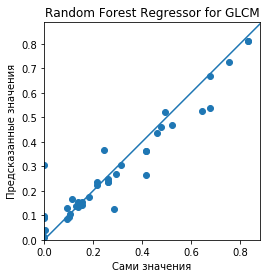

In [714]:
import matplotlib.pyplot as plt
import math

plt.scatter(testY_reshaped,glcm_forest_predicted)
plt.title("Random Forest Regressor for GLCM")
plt.xlabel('Сами значения')
plt.ylabel('Предсказанные значения')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [716]:
glcm_forest.score(glcm_testX,testY_reshaped)

0.9006301926507326

In [781]:
i=36
gray_for_test=gray_testX[i]
for_test=testX[i]
print(gray_for_test.shape)

(224, 224)


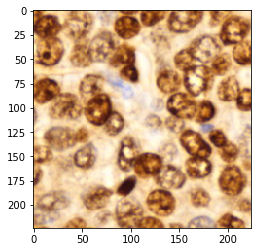

In [782]:
plt.imshow(for_test)

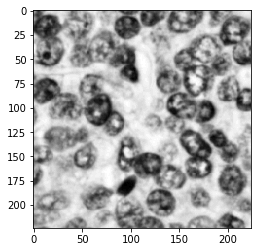

In [783]:
plt.imshow(gray_for_test,cmap="gray")

In [784]:
glcm = greycomatrix(gray_for_test,
                        distances=[5,10], 
                        angles=[0,np.pi/2,np.pi/4],
                        levels=51, symmetric=True, normed=True)
    
a=greycoprops(glcm,"dissimilarity")[0,0]
aa=greycoprops(glcm,"dissimilarity")[0,1]
aaa=greycoprops(glcm,"dissimilarity")[1,0]
a5=greycoprops(glcm,"dissimilarity")[0,2]

b=greycoprops(glcm,"correlation")[0,0]
bb=greycoprops(glcm,"correlation")[0,1]
bbb=greycoprops(glcm,"correlation")[1,0]
b5=greycoprops(glcm,"correlation")[0,2]    
    
c=greycoprops(glcm,"homogeneity")[0,0]
cc=greycoprops(glcm,"homogeneity")[0,1]
ccc=greycoprops(glcm,"homogeneity")[1,0]

predicted_value=glcm_forest.predict([[a,aa,aaa,b,bb,bbb,c,cc,ccc]])
predicted_value*=65

Malignant cell quantity:  47.21428571428576


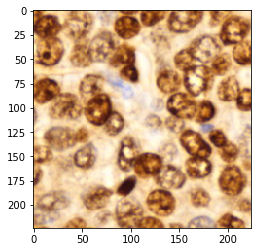

In [785]:
print("Malignant cell quantity: ", predicted_value[0])
plt.imshow(for_test)